In [20]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import itertools


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from datetime import datetime as dt
import datetime

In [2]:
# read data file
FlightData = pd.read_csv('data/FlightData.csv')

In [3]:
FlightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306810 entries, 0 to 306809
Data columns (total 20 columns):
Unnamed: 0             306810 non-null int64
FL_DATE                306810 non-null object
YEAR                   306810 non-null int64
MONTH                  306810 non-null int64
DAY_OF_MONTH           306810 non-null int64
DAY_OF_WEEK            306810 non-null int64
OP_UNIQUE_CARRIER      306810 non-null object
OP_CARRIER_FL_NUM      306810 non-null int64
ORIGIN                 306810 non-null object
DEST                   306810 non-null object
CRS_ARR_TIME           306810 non-null int64
ARR_TIME               306810 non-null float64
DISTANCE               306810 non-null int64
CANCELLED              306810 non-null int64
CARRIER_DELAY          49345 non-null float64
WEATHER_DELAY          49345 non-null float64
NAS_DELAY              49345 non-null float64
SECURITY_DELAY         49345 non-null float64
LATE_AIRCRAFT_DELAY    49345 non-null float64
Delay                  

In [4]:
def SetUp_Xy(FlightData):
    #print(FlightData.shape)
    # drop Alaska Airlines flights to shrink dataset
    #FlightData.drop(FlightData[FlightData.OP_UNIQUE_CARRIER == 'AS'].index,inplace=True)
    #print(FlightData.shape)
    
    # take a smaller sample of the data
    #FlightData = FlightData.sample(n=1000)

    SEA_outbound = False  # drop outbound flights if True
    SEA_inbound = True    # drop inbound flights if True
    if not SEA_inbound:
        print('dropping records arriving in SEA')
        FlightData.drop(FlightData[FlightData.DEST == 'SEA'].index,inplace=True)

    elif not SEA_outbound:
        print('dropping flights departing SEA')
        FlightData.drop(FlightData[FlightData.ORIGIN == 'SEA'].index,inplace=True)
    #print(FlightData.shape)

    # create one-hot columns for Airline Carrier
    X = pd.get_dummies(FlightData[['OP_UNIQUE_CARRIER']])
    #X = pd.DataFrame()
    
    # add datetime for FL_DATE (flight date)
    #X['FlightDate'] = pd.to_datetime(FlightData['FL_DATE'])
    #X['FlightDate'] = pd.to_datetime(FlightData['FL_DATE']).apply(lambda x: x.toordinal())
    X['Day_of_year'] = (pd.to_datetime(FlightData['FL_DATE'])).dt.dayofyear

    # add other columns 
    X = pd.concat([X, FlightData[['DAY_OF_WEEK','CRS_ARR_TIME','ARR_TIME','DISTANCE']]], 
                  axis=1, sort=False)
    #X = pd.concat([X, FlightData[['CRS_ARR_TIME','DISTANCE']]], 
    #              axis=1, sort=False)
        
    # set up target
    y = FlightData['Delay']

    return X,y

In [6]:
X,y = SetUp_Xy(FlightData)

dropping flights departing SEA


In [9]:
X.columns

Index(['OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_B6',
       'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_F9', 'OP_UNIQUE_CARRIER_G4',
       'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_NK', 'OP_UNIQUE_CARRIER_OO',
       'OP_UNIQUE_CARRIER_UA', 'OP_UNIQUE_CARRIER_VX', 'OP_UNIQUE_CARRIER_WN',
       'Day_of_year', 'DAY_OF_WEEK', 'CRS_ARR_TIME', 'ARR_TIME', 'DISTANCE'],
      dtype='object')

In [8]:
print(X.mean())

OP_UNIQUE_CARRIER_AA       0.065919
OP_UNIQUE_CARRIER_AS       0.366843
OP_UNIQUE_CARRIER_B6       0.012403
OP_UNIQUE_CARRIER_DL       0.170207
OP_UNIQUE_CARRIER_F9       0.005406
OP_UNIQUE_CARRIER_G4       0.013358
OP_UNIQUE_CARRIER_HA       0.004487
OP_UNIQUE_CARRIER_NK       0.012271
OP_UNIQUE_CARRIER_OO       0.143671
OP_UNIQUE_CARRIER_UA       0.073836
OP_UNIQUE_CARRIER_VX       0.010073
OP_UNIQUE_CARRIER_WN       0.121526
Day_of_year              184.492477
DAY_OF_WEEK                3.949397
CRS_ARR_TIME            1474.049438
ARR_TIME                1462.246037
DISTANCE                1195.625601
dtype: float64


In [11]:
#X.FlightDate = (X.FlightDate - X.FlightDate.mean())/X.FlightDate.std()
X.DISTANCE = (X.DISTANCE - X.DISTANCE.mean())/X.DISTANCE.std()
X.ARR_TIME = (X.ARR_TIME - X.ARR_TIME.mean())/X.ARR_TIME.std()
X.CRS_ARR_TIME = (X.CRS_ARR_TIME - X.CRS_ARR_TIME.mean())/X.CRS_ARR_TIME.std()
X.Day_of_year = (X.Day_of_year - X.Day_of_year.mean())/X.Day_of_year.std()
X.DAY_OF_WEEK = (X.DAY_OF_WEEK - X.DAY_OF_WEEK.mean())/X.DAY_OF_WEEK.std()

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_pred)

[0 0 0 ..., 0 0 0]


In [13]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.833160652882


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     54506
           1       0.58      0.29      0.39     12091

   micro avg       0.83      0.83      0.83     66597
   macro avg       0.72      0.62      0.65     66597
weighted avg       0.81      0.83      0.81     66597



## SVM

In [15]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.97357238314038175

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     54506
           1       1.00      0.85      0.92     12091

   micro avg       0.97      0.97      0.97     66597
   macro avg       0.98      0.93      0.95     66597
weighted avg       0.97      0.97      0.97     66597



Confusion matrix, without normalization
[[54506     0]
 [ 1760 10331]]


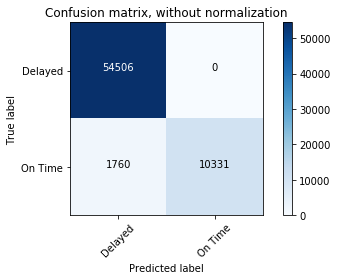

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('Delayed','On Time'),
                      title='Confusion matrix, without normalization')


## Monkey Model (assume predict all on-time)

In [ ]:
# create training target assuming always on-time
no_delays = np.zeros(shape=y_test.shape, dtype='int')

In [ ]:
print(y_train.shape,no_delays.shape)

In [ ]:
print(accuracy_score(y_test,no_delays))
print(classification_report(y_test, no_delays))

### Confusion Matrix

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


### TRY

Split date in to YEAR, MONTH, DAY, DAYOFWEEK   

There's a datetime option that adds holidays     

plot_confusion_matrix   
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

LASSO for Logistic Regression   
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

grid search for optimal tuning parameters

pipeline